### Importing the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the datasets

In [17]:
customers = pd.read_csv('Customers.csv')
customers.info

<bound method DataFrame.info of     CustomerID        CustomerName         Region  SignupDate
0        C0001    Lawrence Carroll  South America  2022-07-10
1        C0002      Elizabeth Lutz           Asia  2022-02-13
2        C0003      Michael Rivera  South America  2024-03-07
3        C0004  Kathleen Rodriguez  South America  2022-10-09
4        C0005         Laura Weber           Asia  2022-08-15
..         ...                 ...            ...         ...
195      C0196         Laura Watts         Europe  2022-06-07
196      C0197    Christina Harvey         Europe  2023-03-21
197      C0198         Rebecca Ray         Europe  2022-02-27
198      C0199      Andrea Jenkins         Europe  2022-12-03
199      C0200         Kelly Cross           Asia  2023-06-11

[200 rows x 4 columns]>

In [18]:
products = pd.read_csv('Products.csv')
products.info

<bound method DataFrame.info of    ProductID              ProductName     Category   Price
0       P001     ActiveWear Biography        Books  169.30
1       P002    ActiveWear Smartwatch  Electronics  346.30
2       P003  ComfortLiving Biography        Books   44.12
3       P004            BookWorld Rug   Home Decor   95.69
4       P005          TechPro T-Shirt     Clothing  429.31
..       ...                      ...          ...     ...
95      P096     SoundWave Headphones  Electronics  307.47
96      P097       BookWorld Cookbook        Books  319.34
97      P098         SoundWave Laptop  Electronics  299.93
98      P099   SoundWave Mystery Book        Books  354.29
99      P100        HomeSense Sweater     Clothing  126.34

[100 rows x 4 columns]>

In [19]:
transactions = pd.read_csv('Transactions.csv')
transactions.info

<bound method DataFrame.info of     TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0          T00001      C0199      P067  2024-08-25 12:38:23         1   
1          T00112      C0146      P067  2024-05-27 22:23:54         1   
2          T00166      C0127      P067  2024-04-25 07:38:55         1   
3          T00272      C0087      P067  2024-03-26 22:55:37         2   
4          T00363      C0070      P067  2024-03-21 15:10:10         3   
..            ...        ...       ...                  ...       ...   
995        T00496      C0118      P037  2024-10-24 08:30:27         1   
996        T00759      C0059      P037  2024-06-04 02:15:24         3   
997        T00922      C0018      P037  2024-04-05 13:05:32         4   
998        T00959      C0115      P037  2024-09-29 10:16:02         2   
999        T00992      C0024      P037  2024-04-21 10:52:24         1   

     TotalValue   Price  
0        300.68  300.68  
1        300.68  300.68  
2        300.

### Checking for missing values in the dataset

In [11]:
print("No missing values in Customers.csv :", customers.notnull().all().all())

No missing values in Customers.csv : True


In [12]:
print("No missing values in Products.csv :", products.notnull().all().all())

No missing values in Products.csv : True


In [13]:
print("No missing values in Transactions.csv :", transactions.notnull().all().all())

No missing values in Transactions.csv : True


### Data Cleaning / Preprocessing

The SignupDate in Customers.csv and TransactionDate in Transactions.csv are treated as strings.

Thus, we need to convert them into standard date time format.

In [20]:
customers.dtypes

CustomerID      object
CustomerName    object
Region          object
SignupDate      object
dtype: object

In [21]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers.dtypes

CustomerID              object
CustomerName            object
Region                  object
SignupDate      datetime64[ns]
dtype: object

In [72]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate,SignupYear,SignupMonth
0,C0001,Lawrence Carroll,South America,2022-07-10,2022,2022-07
1,C0002,Elizabeth Lutz,Asia,2022-02-13,2022,2022-02
2,C0003,Michael Rivera,South America,2024-03-07,2024,2024-03
3,C0004,Kathleen Rodriguez,South America,2022-10-09,2022,2022-10
4,C0005,Laura Weber,Asia,2022-08-15,2022,2022-08


In [69]:
customers.to_csv('Customers_Preprocessed.csv', index=False, sep=',')

In [22]:
transactions.dtypes

TransactionID       object
CustomerID          object
ProductID           object
TransactionDate     object
Quantity             int64
TotalValue         float64
Price              float64
dtype: object

In [23]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions.dtypes

TransactionID              object
CustomerID                 object
ProductID                  object
TransactionDate    datetime64[ns]
Quantity                    int64
TotalValue                float64
Price                     float64
dtype: object

In [73]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,TransactionMonth,Year,Month
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,2024-08,2024,2024-08
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,2024-05,2024,2024-05
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,2024-04,2024,2024-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,2024-03,2024,2024-03
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,2024-03,2024,2024-03


In [70]:
transactions.to_csv('Transactions_Preprocessed.csv', index=False, sep=',')

### Exploratory Data Analysis

#### Analysis of Number of Customers Signingup with respect to Time

Yearly Customer Signups

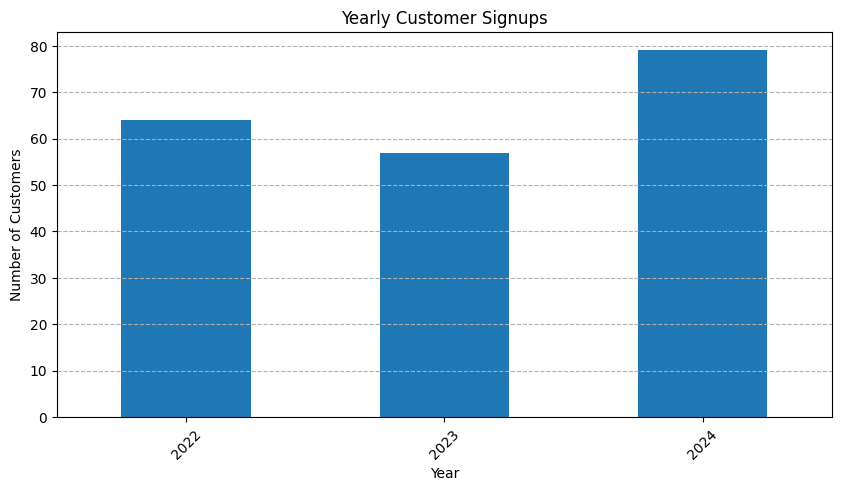

In [30]:
customers['SignupYear'] = customers['SignupDate'].dt.year
yearly_signups = customers.groupby('SignupYear').size()

plt.figure(figsize=(10, 5))
yearly_signups.plot(kind='bar')
plt.title('Yearly Customer Signups')
plt.xlabel('Year')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

Monthly Customer Signups

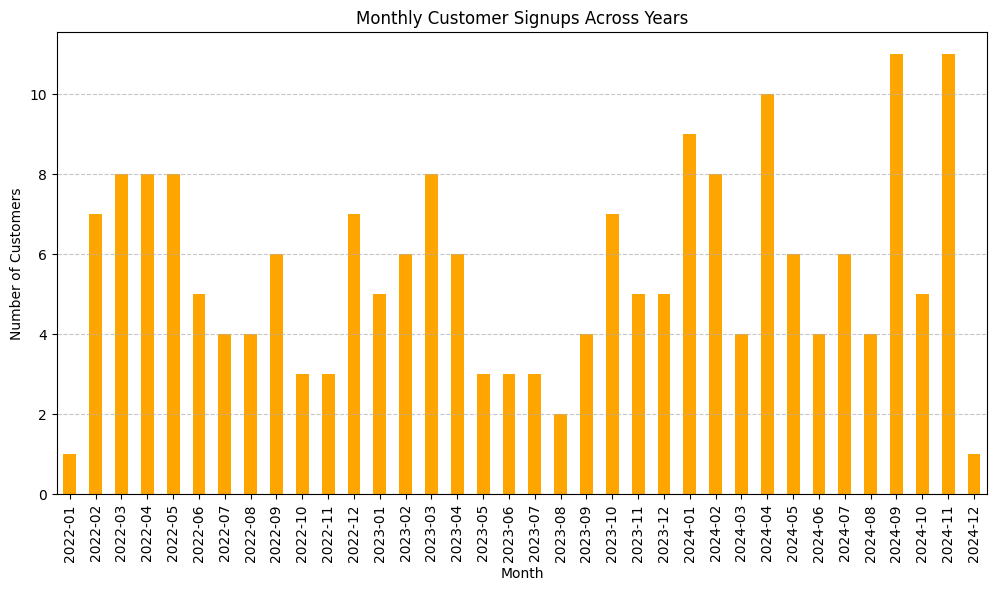

In [35]:
customers['SignupMonth'] = customers['SignupDate'].dt.to_period('M')
monthly_signups = customers.groupby('SignupMonth').size()

plt.figure(figsize=(12, 6))
monthly_signups.plot(kind='bar', color='orange')
plt.title('Monthly Customer Signups Across Years')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Change in Total Number of Customers Over Time 

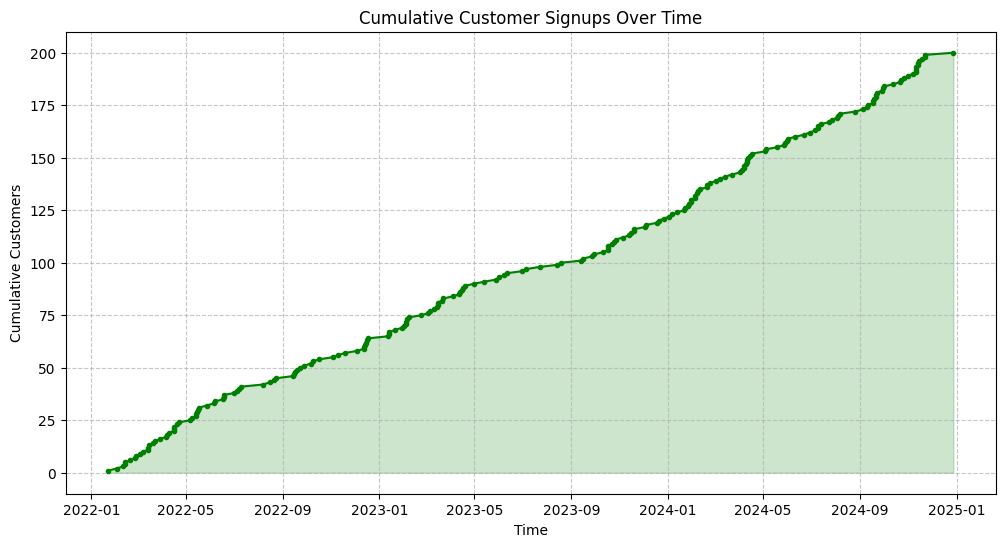

In [42]:
customers_sorted = customers.sort_values(by='SignupDate')
customers_sorted['CumulativeSignups'] = range(1, len(customers_sorted) + 1)

plt.figure(figsize=(12, 6))
plt.plot(customers_sorted['SignupDate'], customers_sorted['CumulativeSignups'], marker='.', color='green')
plt.fill_between(customers_sorted['SignupDate'], customers_sorted['CumulativeSignups'], color='green', alpha=0.2)
plt.title('Cumulative Customer Signups Over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Customers')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

#### Distribution of Customers over Region

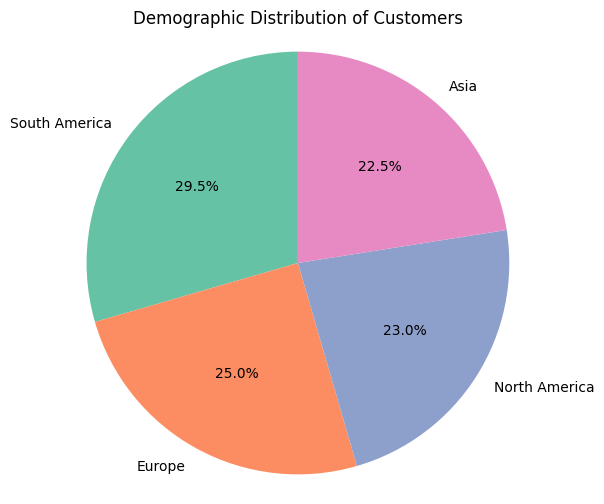

In [49]:
region_counts = customers['Region'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2', len(region_counts)))
plt.title('Demographic Distribution of Customers')
plt.axis('equal')
plt.show()

#### Distribution of Various Categories of Products in the Warehouse

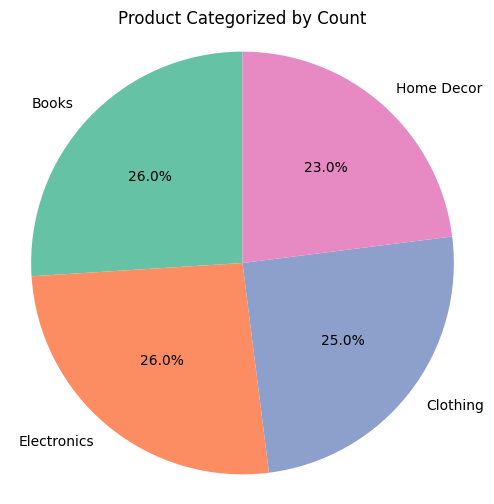

In [50]:
category_counts = products['Category'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2', len(category_counts)))
plt.title('Product Categorized by Count')
plt.axis('equal')
plt.show()

#### Revenue Analysis over Time

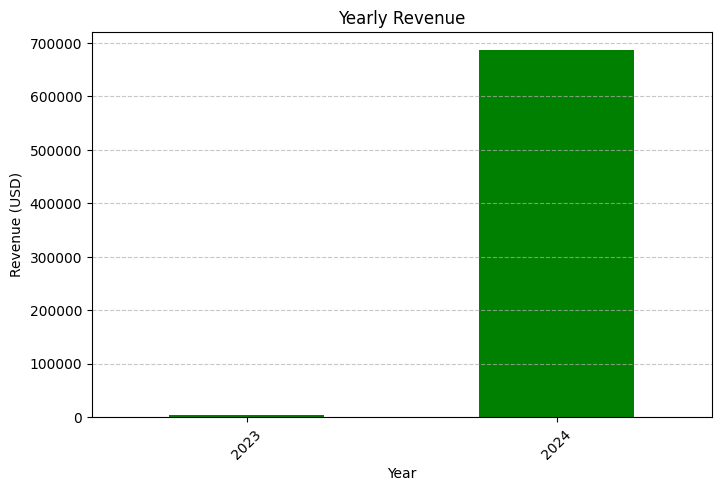

In [66]:
transactions['Year'] = transactions['TransactionDate'].dt.year
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')

yearly_revenue = transactions.groupby('Year')['TotalValue'].sum()
plt.figure(figsize=(8, 5))
yearly_revenue.plot(kind='bar', color='green')
plt.title('Yearly Revenue')
plt.xlabel('Year')
plt.ylabel('Revenue (USD)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

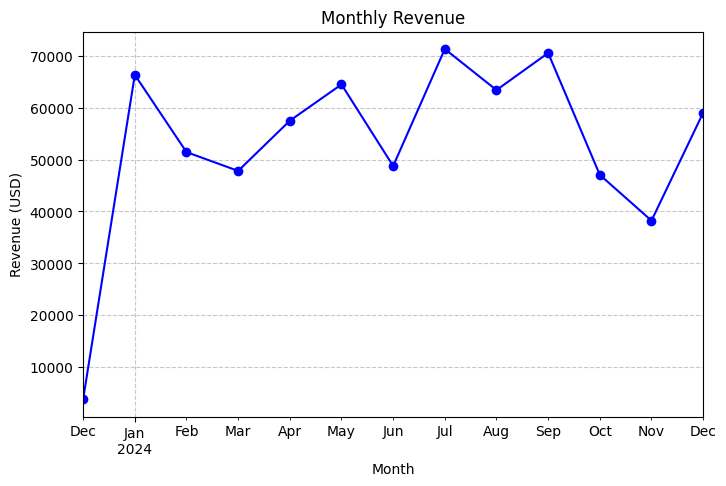

In [59]:
monthly_revenue = transactions.groupby('Month')['TotalValue'].sum()
plt.figure(figsize=(8, 5))
monthly_revenue.plot(kind='line', marker='o', color='blue')
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue (USD)')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

#### Revenue Breakdown based on Product Category

Revenue by Product Category:
 Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64 



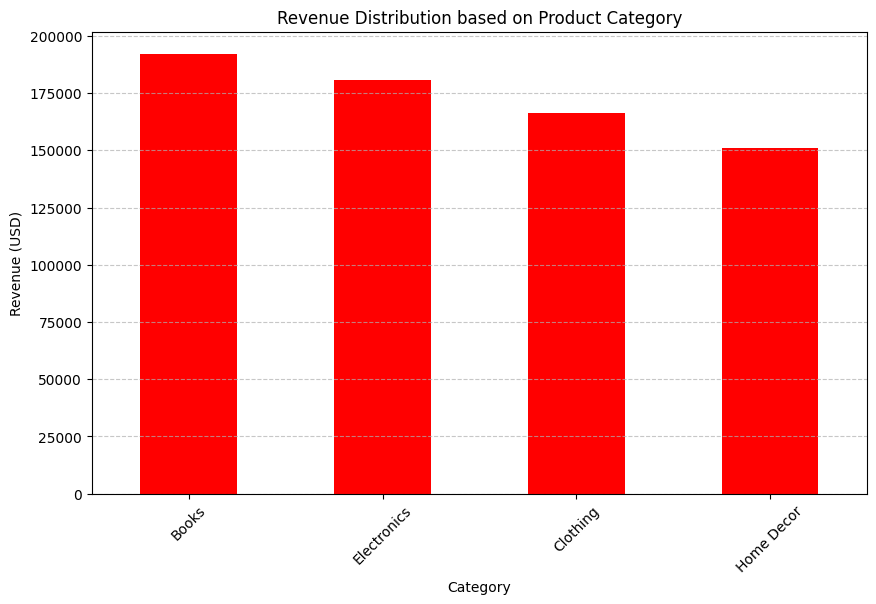

In [67]:
merged_data = pd.merge(transactions, products, on='ProductID')
category_revenue = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print("Revenue by Product Category:\n", category_revenue, "\n")

plt.figure(figsize=(10, 6))
category_revenue.plot(kind='bar', color='red')
plt.title('Revenue Distribution based on Product Category')
plt.xlabel('Category')
plt.ylabel('Revenue (USD)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()